## Library Imports

In [15]:
import numpy as np
from math import sin,cos
import matplotlib.pyplot as plt

### Question 1

<img src = "../images/ex_1_p2.jpg" alt = "Ex_1_P2">

#### Initial Conditions

In [16]:
x_0 = 0.1
y_0 = 0.1
z_0 = np.array([x_0, y_0])
t = 0

#### Run Euler Scheme

In [17]:
def run_forward_euler(delta_t: float) -> None:
    x_coordinates: list = [x_0]
    y_coordinates: list = [y_0]

    z_k = z_0
    x_k = x_0
    y_k = y_0

    for i in range(0, int(30/delta_t)):
        z_k = z_k + delta_t * np.array([y_k, -x_k + (1 - x_k ** 2) * y_k])
        x_k, y_k = z_k
        x_coordinates.append(x_k)
        y_coordinates.append(y_k)

    plt.plot(x_coordinates, y_coordinates)
    plt.title(f"Forward Euler Scheme with delta t = {delta_t}")
    plt.xlabel("x(t)")
    plt.ylabel("y(t)")

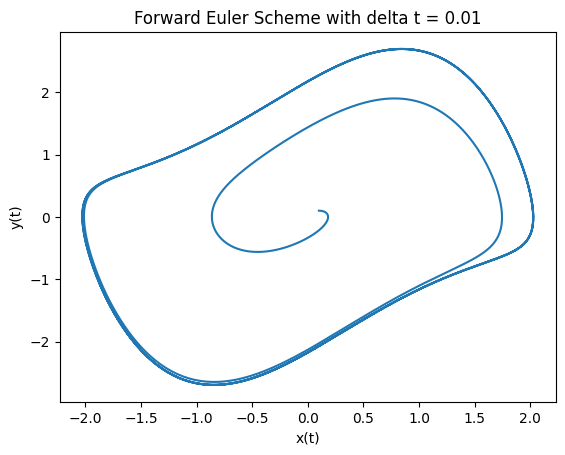

In [18]:
run_forward_euler(delta_t=0.01)

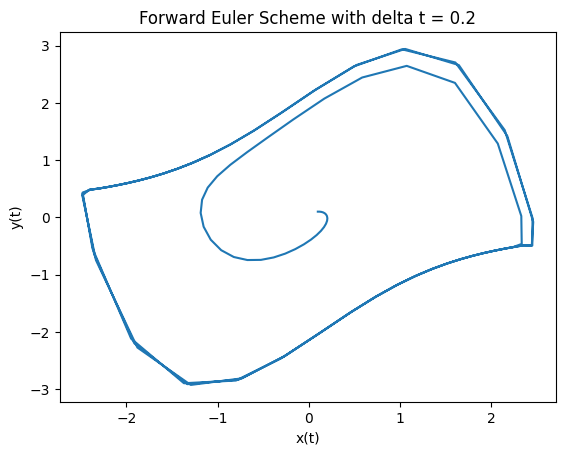

In [19]:
run_forward_euler(delta_t=0.2)

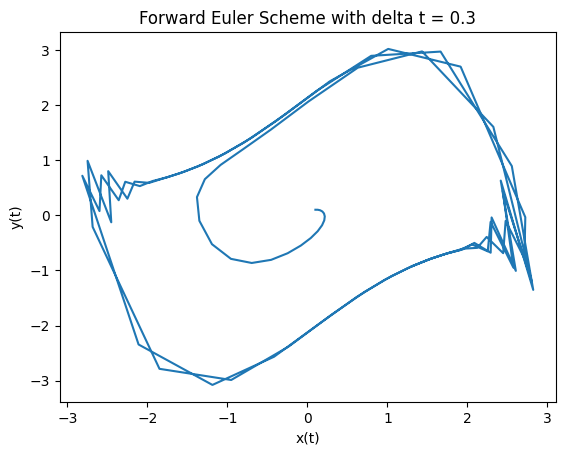

In [20]:
run_forward_euler(delta_t=0.3)

### Question 2

<img src = "../images/ex_1_p1.jpg" alt = "Ex_1_P1">

### Solution to Problem 2 A part

In [21]:
def original_harmonic_oscillator(old_params,m, k, dt = 0.01,N=1):
    x_old,y_old = old_params
    substeps = int(1/dt)
    y_t = [] # We store y(0),y(1)... in this
    x_t = [] # We store x(0),x(1)... in this
    y_t.append(y_old)
    x_t.append(x_old)
    for i in range(1,N+1): #We go till N+1 only since we already have initial points that start from 0 appended to the list.
        x_old = x_t[i-1]
        y_old = y_t[i-1]
        for substep in range(0,substeps):
            # calculating new position and momentum
            x_new = x_old + (dt/m)*(y_old)
            y_new = y_old - (dt*k)*(x_old)
        
            # revising the position and momentum after every dt interval.
            x_old,y_old = x_new,y_new
        # After updating position and momentum for 1/dt times, they are the new position and momentum at n'th observed moment.
        # We append it to x_t and y_t array.
        x_t.append(x_old) 
        y_t.append(y_old)
    return y_t

old_params = np.array([1.0,1.0])
dt = 0.01
m = 1 # By comparing the given equations with simple harmonic oscillator equations.
k = 1 # By comparing the given equations with simple harmonic oscillator equations.

# We put N = 11, since we are taking initial start from N = 0.
y = original_harmonic_oscillator(old_params,m,k,dt,N = 10)

print(f"True value of y(5) by use of simple euler method is {y[5]}")
print(f"True value of y(10) by use of simple euler method is {y[10]}")

True value of y(5) by use of simple euler method is 1.273925690316826
True value of y(10) by use of simple euler method is -0.3106618221316094


### Solution to Problem 2 B part

- By the above values of y(5), y(10) and given trigonometric equation, we can form the following linear equations to be solved
- 1.2739 = -x_0*sin(5) + y_0*cos(5)
- -0.3106 = -x_0*sin(5) + y_0*cos(5)
- This system of equations can be solved by the following code, to find the values of x_0 and y_0

In [22]:
# Forming the matrix to be solved for the unknown
M = np.array([[np.sin(5), np.cos(5)], [np.sin(10), np.cos(10)]])
b = np.array([[1.2739], [-0.3106]])

var = np.linalg.solve(M, b)
var

array([[-1.0228    ],
       [ 1.03331452]])

- By observing the values of var, we have x_0 = 1.0228 and y_0 = 1.033, x_0's sign changes cause of the trigonometric equation has -ve sign in the sin(t) term
- Thus we can say that the x_0 and y_0 values are very close to their true values of 1.0

### Solution to Problem 2 C part

In [23]:
y = original_harmonic_oscillator(old_params,m,k,dt=0.1,N = 10)
print(f"True value of y(5) by use of simple euler method is {y[5]}")
print(f"True value of y(10) by use of simple euler method is {y[10]}")

True value of y(5) by use of simple euler method is 1.5789676217711568
True value of y(10) by use of simple euler method is -0.5603400541582387


In [24]:
# Forming the matrix to be solved for the unknown
M = np.array([[np.sin(5), np.cos(5)], [np.sin(10), np.cos(10)]])
b = np.array([[1.5789], [-0.5603]])

var = np.linalg.solve(M, b)
var

array([[-1.21581458],
       [ 1.45604845]])

- By observing the values of y(5), y(10), x_0, y_0, we can say that increasing the value of dt, makes the model more error prone.
- This is mainly because we update the x and y for less number of times before getting out the observations

### Rough Work - To Be Ignored

### Matrix Multiplication version of simple euler forward method Calculation

In [25]:
def mat_mult(c,power):
    return np.linalg.matrix_power(c,power)

In [26]:
import numpy as np
n = 10
dt = 0.01
L = int(1/dt)
m = 1
k = 1
Z = []
z_old = np.array([1.0,1.0])
Z.append(z_old)
c = np.array([[1, dt/m], [-dt*k, 1]])

for i in range(1,n+1):
    z_new = mat_mult(c,i*L).dot(Z[0])
    Z.append(z_new)

print(f"Value of y(5) by use of matrix multiplication in simple euler method is {Z[5][1]}")
print(f"Value of y(10) by use of matrix multiplication in simple euler method is {Z[10][1]}")

Value of y(5) by use of matrix multiplication in simple euler method is 1.27392569031684
Value of y(10) by use of matrix multiplication in simple euler method is -0.3106618221316164


In [27]:
import numpy as np
n = 10
dt = 0.01
L = int(1/dt)
m = 1
k = 1
Z = []
z_old = np.array([1.0,1.0])
Z.append(z_old)
c = np.array([[1, dt/m], [-dt*k, 1]])

for i in range(1,n+1):
    z_new = mat_mult(c,L).dot(Z[i-1])
    Z.append(z_new)

print(f"Value of y(5) by use of matrix multiplication in simple euler method is {Z[5][1]}")
print(f"Value of y(10) by use of matrix multiplication in simple euler method is {Z[10][1]}")

Value of y(5) by use of matrix multiplication in simple euler method is 1.27392569031684
Value of y(10) by use of matrix multiplication in simple euler method is -0.31066182213161575
